<a href="https://colab.research.google.com/github/woodsj1206/Train-Yolov8-Instance-Segmentation-On-Custom-Dataset/blob/main/Train_Yolov8_Instance_Segmentation_On_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pretrained Model: https://github.com/woodsj1206/Train-Yolov8-Instance-Segmentation-On-Custom-Dataset/blob/main/Train_Yolov8_Instance_Segmentation_On_Custom_Dataset.ipynb

#Step 1: Checking GPU Availability
Check if a GPU is available in your Google Colab environment. A GPU can significantly accelerate the training process of deep learning models like YOLOv8.

In [ ]:
!nvidia-smi

Sun Apr 27 02:38:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Step 2: Unzipping Dataset Files
Unzip the dataset files containing images and annotations. These files are typically compressed to save space and are now being extracted for use in training the YOLOv8 model.

**NOTE:** Ensure that the images and their corresponding annotation files have the same names (e.g., image_1.png should have an associated image_1.txt file).

In [ ]:
'''
# Unzip the zip file containing the images
!unzip -q 'REPLACE_WITH_YOUR_IMAGE_ZIP_FILE_PATH' -d '/content/images'

# Unzip the zip file containing the annotations
!unzip -q 'REPLACE_WITH_YOUR_ANNOTATIONS_ZIP_FILE_PATH' -d '/content/annotations'
'''

"\n# Unzip the zip file containing the images\n!unzip -q 'REPLACE_WITH_YOUR_IMAGE_ZIP_FILE_PATH' -d '/content/images'\n\n# Unzip the zip file containing the annotations\n!unzip -q 'REPLACE_WITH_YOUR_ANNOTATIONS_ZIP_FILE_PATH' -d '/content/annotations'\n"

#Step 3: Installing Ultralytics
Install Ultralytics, a library that simplifies working with YOLO object detection models.

In [ ]:
# Install Ultralytics library
!pip install ultralytics

# Import necessary modules from Ultralytics
from ultralytics import YOLO

  Using cached ultralytics-8.3.118-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

#Step 4: Mounting Google Drive
Mount Google Drive to the Colab environment, enabling access to files stored in your Google Drive.

In [ ]:
# Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive to '/content/Google_Drive'
drive.mount('/content/drive')

Mounted at /content/drive


#Step 5: Define Root Directory and Create Subdirectories
Define the root directory for your project and create necessary subdirectories to organize your data.

In [ ]:
import os

# Define the path where your original images and masks are
PATH = "/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001"

# Define where you want to save the processed dataset
ROOT_DIR = "/content/drive/MyDrive/BreastCancerProject/Datasets/ProcessedDataset"

# Create directories for dataset structure
DATA_DIR = os.path.join(ROOT_DIR, 'data')

IMAGES_DIR = os.path.join(DATA_DIR, 'images')
IMAGES_TRAIN_DIR = os.path.join(IMAGES_DIR, 'train')
IMAGES_VAL_DIR = os.path.join(IMAGES_DIR, 'val')

LABELS_DIR = os.path.join(DATA_DIR, 'labels')
LABELS_TRAIN_DIR = os.path.join(LABELS_DIR, 'train')
LABELS_VAL_DIR = os.path.join(LABELS_DIR, 'val')

TESTING_DIR = os.path.join(ROOT_DIR, 'testing')

# Create folders if ROOT_DIR doesn't exist
if not os.path.exists(ROOT_DIR):
    os.makedirs(IMAGES_TRAIN_DIR)
    os.makedirs(IMAGES_VAL_DIR)
    os.makedirs(LABELS_TRAIN_DIR)
    os.makedirs(LABELS_VAL_DIR)
    os.makedirs(TESTING_DIR)
    print(f"✅ Root directory '{ROOT_DIR}' created successfully.")
else:
    print(f"ℹ️ Root directory '{ROOT_DIR}' already exists.")


ℹ️ Root directory '/content/drive/MyDrive/BreastCancerProject/Datasets/ProcessedDataset' already exists.


#Step 6: Organize Dataset for Training and Validation
Organize the dataset by moving images and corresponding annotations into separate directories for training and validation.

In [ ]:
import os

folder_path = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001/benign'

print(os.listdir(folder_path))


['benign (3).png', 'benign2 (251).png', 'benign2 (237)_mask.png', 'benign (280)_mask.png', 'benign (318).png', 'benign2 (269).png', 'benign2 (250)_mask.png', 'benign (284)_mask.png', 'benign2 (24)_mask.png', 'benign2 (242)_mask.png', 'benign (315).png', 'benign (309).png', 'benign2 (236).png', 'benign2 (247).png', 'benign (311)_mask.png', 'benign2 (251)_mask.png', 'benign2 (266).png', 'benign2 (242).png', 'benign2 (27)_mask.png', 'benign (320).png', 'benign2 (249)_mask.png', 'benign (15).png', 'benign (138)_mask.png', 'benign2 (243).png', 'benign2 (267).png', 'benign (313)_mask.png', 'benign2 (243)_mask.png', 'benign2 (252).png', 'benign2 (245)_mask.png', 'benign2 (236)_mask.png', 'benign2 (261)_mask.png', 'benign2 (240)_mask.png', 'benign2 (248).png', 'benign2 (239).png', 'benign2 (250).png', 'benign (317).png', 'benign2 (269)_mask.png', 'benign2 (235)_mask.png', 'benign (158)_mask.png', 'benign (146)_mask.png', 'benign (159).png', 'benign (167)_mask.png', 'benign (191).png', 'benign 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder_path = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001/benign'

all_files = os.listdir(folder_path)

# Normalize filenames (just in case)
all_files = [f.strip() for f in all_files]

# Separate images and masks
image_files = [f for f in all_files if '_mask' not in f and (f.endswith('.png') or f.endswith('.jpg'))]
mask_files = [f for f in all_files if '_mask' in f and (f.endswith('.png') or f.endswith('.jpg'))]

print(f"Images (no '_mask'): {len(image_files)}")
print(f"Masks (with '_mask'): {len(mask_files)}")


Images (no '_mask'): 874
Masks (with '_mask'): 908


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Corrected Paths (matching your setup)
DATASET_ROOT = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001'

# See a few sample filenames
for class_folder in os.listdir(DATASET_ROOT):
    print(f"📂 {class_folder}")
    sample_files = os.listdir(os.path.join(DATASET_ROOT, class_folder))[:10]
    for f in sample_files:
        print(f"   {f}")
    print("\n")

IMAGES_TRAIN_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/images/train'
IMAGES_VAL_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/images/val'
LABELS_TRAIN_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/labels/train'
LABELS_VAL_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/labels/val'

# Create the output directories if they don't exist
os.makedirs(IMAGES_TRAIN_DIR, exist_ok=True)
os.makedirs(IMAGES_VAL_DIR, exist_ok=True)
os.makedirs(LABELS_TRAIN_DIR, exist_ok=True)
os.makedirs(LABELS_VAL_DIR, exist_ok=True)

# List of subfolders: benign, malignant, normal
class_folders = os.listdir(DATASET_ROOT)

for class_folder in class_folders:
    folder_path = os.path.join(DATASET_ROOT, class_folder)

    all_files = os.listdir(folder_path)

    # Separate images and masks
    image_files = [f for f in all_files if '_mask' not in f]
    mask_files = [f for f in all_files if '_mask' in f]

    # Create a dictionary for fast mask lookup
    mask_dict = {f.replace('_mask', '').replace('.png', '').replace('.jpg', ''): f for f in mask_files}

    valid_image_files = []
    valid_mask_files = []

    # Match images with their masks
    for img in image_files:
        base_name = img.replace('.png', '').replace('.jpg', '')
        if base_name in mask_dict:
            valid_image_files.append(img)
            valid_mask_files.append(mask_dict[base_name])
        else:
            print(f"⚠️ Warning: No mask found for {img} in {class_folder}")

    # Safety check
    if len(valid_image_files) == 0:
        print(f"⚠️ Skipping {class_folder} because no valid images were found.")
        continue

    # Now safe to split
    train_images, val_images, train_masks, val_masks = train_test_split(
        valid_image_files, valid_mask_files, test_size=0.3, random_state=42
    )

    # Move training images and masks
    for img, mask in zip(train_images, train_masks):
        shutil.copy(os.path.join(folder_path, img), os.path.join(IMAGES_TRAIN_DIR, f"{class_folder}_{img}"))
        shutil.copy(os.path.join(folder_path, mask), os.path.join(LABELS_TRAIN_DIR, f"{class_folder}_{mask}"))

    # Move validation images and masks
    for img, mask in zip(val_images, val_masks):
        shutil.copy(os.path.join(folder_path, img), os.path.join(IMAGES_VAL_DIR, f"{class_folder}_{img}"))
        shutil.copy(os.path.join(folder_path, mask), os.path.join(LABELS_VAL_DIR, f"{class_folder}_{mask}"))

print("✅ Done copying files!")


📂 normal
   normal2 (94)_mask.png
   normal2 (70).png
   normal2 (9)_mask.png
   normal2 (96).png
   normal2 (90).png
   normal2 (77)_mask.png
   normal2 (79).png
   normal2 (9).png
   normal2 (92)_mask.png
   normal2 (91).png


📂 benign
   benign (3).png
   benign2 (251).png
   benign2 (237)_mask.png
   benign (280)_mask.png
   benign (318).png
   benign2 (269).png
   benign2 (250)_mask.png
   benign (284)_mask.png
   benign2 (24)_mask.png
   benign2 (242)_mask.png


📂 malignant
   malignant2 (79).png
   malignant2 (92).png
   malignant2 (87).png
   malignant2 (8)_mask.png
   malignant2 (79)_mask.png
   malignant2 (94)_mask.png
   malignant2 (87)_mask.png
   malignant2 (80)_mask.png
   malignant2 (98).png
   malignant2 (96).png


✅ Done copying files!


#Step 7: Generate YAML Configuration File
Create a YAML configuration file specifying the paths to the training and validation datasets, as well as the class names (labels) used in your dataset.

In [ ]:
import os
import yaml

# Set your actual project paths
ROOT_DIR = '/content/drive/MyDrive/BreastCancerProject/Datasets'

# Define the updated data structure
data = {
    'path': ROOT_DIR,  # already correct, no /data
    'train': 'train/images',
    'val': 'val/images',
    'names': {
        0: 'benign',
        1: 'malignant'
    }
}

# Construct the full path to the YAML file
output_file = os.path.join(ROOT_DIR, "config.yaml")

# Write the updated data to the YAML file
with open(output_file, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"✅ Updated YAML config saved to {output_file}")

✅ Updated YAML config saved to /content/drive/MyDrive/BreastCancerProject/Datasets/config.yaml


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Set your dataset paths
DATASET_ROOT = '/content/drive/MyDrive/BreastCancerProject/Datasets'
IMAGES_DIR = os.path.join(DATASET_ROOT, 'train', 'images')
LABELS_DIR = os.path.join(DATASET_ROOT, 'train', 'labels')

VAL_IMAGES_DIR = os.path.join(DATASET_ROOT, 'val', 'images')
VAL_LABELS_DIR = os.path.join(DATASET_ROOT, 'val', 'labels')

# Function to create label files from masks
def create_labels_from_masks(image_dir, label_dir):
    os.makedirs(label_dir, exist_ok=True)

    files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

    for img_file in tqdm(files, desc=f"Processing {image_dir}"):
        base_name = os.path.splitext(img_file)[0]

        # Figure out the class from the filename
        if base_name.startswith('benign'):
            class_id = 0
        elif base_name.startswith('malignant'):
            class_id = 1
        elif base_name.startswith('normal'):
            # ⚡️ Skip normal images (no segmentation targets)
            continue
        else:
            print(f"⚠️ Warning: Unknown class in {img_file}, skipping.")
            continue

        # Find corresponding mask
        if '_mask' not in base_name:
            mask_file = base_name + '_mask.png'
        else:
            mask_file = img_file  # fallback

        mask_path = os.path.join(image_dir.replace('images', 'labels'), mask_file)
        image_path = os.path.join(image_dir, img_file)

        if not os.path.exists(mask_path):
            print(f"⚠️ Mask not found for {img_file}, skipping.")
            continue

        # Load mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"⚠️ Could not read mask {mask_path}")
            continue

        # Check if the mask is completely empty (no objects)
        if np.sum(mask) == 0:
            print(f"⚠️ Empty mask for {img_file}, skipping.")
            continue

        h, w = mask.shape

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        label_lines = []
        for contour in contours:
            if len(contour) < 3:  # ignore tiny or invalid contours
                continue

            contour = contour.squeeze()
            if len(contour.shape) != 2:
                continue

            # Normalize points
            norm_points = []
            for point in contour:
                x, y = point
                norm_points.append(x / w)
                norm_points.append(y / h)

            # YOLO segmentation format: class_id x1 y1 x2 y2 ...
            line = f"{class_id} " + " ".join([f"{p:.6f}" for p in norm_points])
            label_lines.append(line)

        # Write to txt
        label_output_path = os.path.join(label_dir, base_name + ".txt")
        with open(label_output_path, 'w') as f:
            for line in label_lines:
                f.write(line + "\n")

# ✨ Run it
create_labels_from_masks(IMAGES_DIR, LABELS_DIR)
create_labels_from_masks(VAL_IMAGES_DIR, VAL_LABELS_DIR)

print("✅ Labels successfully created from masks!")


Processing /content/drive/MyDrive/BreastCancerProject/Datasets/train/images: 100%|██████████| 1091/1091 [19:19<00:00,  1.06s/it]
Processing /content/drive/MyDrive/BreastCancerProject/Datasets/val/images: 100%|██████████| 469/469 [08:31<00:00,  1.09s/it]

✅ Labels successfully created from masks!


#Step 8: Train the YOLOv8 Model
Train the YOLOv8 model using the provided dataset configuration and save the training results.

In [ ]:
from ultralytics import YOLO
import os
import shutil

# Paths
ROOT_DIR = '/content/drive/MyDrive/BreastCancerProject/Datasets'

# Load a pre-trained YOLOv8 segmentation model
model = YOLO('yolov8n-seg.pt')

# Define the path to the training directory
train_dir = '/content/runs/segment/train'

# If it exists, delete it
if os.path.exists(train_dir):
    print("🧹 Deleting previous training folder...")
    shutil.rmtree(train_dir)
else:
    print("✅ No previous training folder found, starting fresh!")

# 🔥 Also clean the 'runs/segment' folder to avoid train2/train3/train4
segment_dir = '/content/runs/segment'
if os.path.exists(segment_dir):
    shutil.rmtree(segment_dir)
    print("🧹 Cleaned /runs/segment folder too!")

# Train the model
model_results = model.train(
    data=os.path.join(ROOT_DIR, 'config.yaml'),  # Use clean path joining
    epochs=20,
    imgsz=512,
    batch=16,
    project='/content/runs/segment',  # project folder
    name='train',                     # always save as 'train'
    exist_ok=True                      # allow overwrite
)

# Save and zip the training results
runs_dir = '/content/runs'
zip_output = f'{ROOT_DIR}/runs'

shutil.make_archive(base_name=zip_output, format='zip', root_dir=runs_dir)

print(f"✅ Training results zipped at: {zip_output}.zip")


100%|██████████| 6.74M/6.74M [00:00<00:00, 343MB/s]


✅ No previous training folder found, starting fresh!
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/BreastCancerProject/Datasets/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/runs/segment, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

100%|██████████| 755k/755k [00:00<00:00, 88.3MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,264,006 parameters, 3,263,990 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 287MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.4±0.1 MB/s, size: 316.2 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1ROJQlPSeF16GYc97sbG3_NqRJLIH60e7/BreastCancerProject/Datasets/train/labels.cache... 1091 images, 186 backgrounds, 0 corrupt: 100%|██████████| 1091/1091 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.3 ms, read: 0.6±0.2 MB/s, size: 388.5 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1ROJQlPSeF16GYc97sbG3_NqRJLIH60e7/BreastCancerProject/Datasets/val/labels.cache... 469 images, 80 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]


Plotting labels to /content/runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.67G      1.422      2.733      2.848      1.414          6        512: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [04:15<00:00, 17.04s/it]


                   all        469        389      0.425      0.127      0.246      0.155      0.419      0.125      0.242      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.5G        1.4      2.213      2.202      1.392          4        512: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]


                   all        469        389      0.212      0.373      0.168     0.0785      0.214       0.37      0.164      0.085

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.5G      1.407      2.201      2.055      1.419          9        512: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]


                   all        469        389      0.201       0.31      0.141     0.0575      0.188      0.399      0.154     0.0664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.5G      1.382      2.137      1.861       1.38          2        512: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.18it/s]


                   all        469        389      0.499      0.488      0.463      0.265      0.506      0.493      0.457      0.268

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.5G       1.34      2.101      1.722      1.352          4        512: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]

                   all        469        389      0.542      0.488      0.442      0.243      0.535      0.448      0.411      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.51G      1.306      2.038        1.6      1.326          8        512: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]

                   all        469        389      0.686      0.561      0.589      0.377      0.669      0.536      0.564      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.51G      1.272      2.018      1.556      1.303          5        512: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]

                   all        469        389      0.691      0.621      0.644      0.422      0.682        0.6      0.631      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.52G      1.231      1.899      1.443      1.278          5        512: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]

                   all        469        389      0.685      0.732      0.704      0.475      0.681      0.712      0.699       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.53G      1.202      1.895      1.395      1.269          5        512: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]

                   all        469        389      0.718      0.599      0.671      0.423      0.701      0.591       0.65      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.54G      1.148       1.84      1.334      1.235          4        512: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]

                   all        469        389      0.676       0.65      0.686      0.463      0.677      0.652       0.68       0.43


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.55G      1.083      1.749      1.268      1.227          2        512: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]

                   all        469        389      0.682      0.682      0.702      0.489      0.677      0.702      0.697      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.57G      1.056      1.684       1.16      1.224          3        512: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        469        389      0.719      0.695      0.738      0.506      0.719      0.695      0.737      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.58G      1.041      1.602      1.055      1.212          2        512: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]

                   all        469        389      0.692      0.712      0.727      0.517      0.692      0.712      0.725      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.58G     0.9771      1.562      1.009      1.154          2        512: 100%|██████████| 69/69 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]

                   all        469        389      0.788      0.685      0.777      0.544      0.788      0.685      0.777      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.58G     0.9645      1.513     0.9538      1.161          2        512: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]

                   all        469        389      0.772      0.722       0.77      0.549      0.763      0.719      0.765      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.58G     0.9163      1.484     0.9027      1.118          3        512: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]

                   all        469        389      0.816       0.76      0.807      0.591      0.821      0.764       0.81      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.58G      0.898      1.473     0.8692      1.114          1        512: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]

                   all        469        389      0.854      0.738      0.834       0.62      0.854      0.738      0.832      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.58G      0.865      1.417     0.8051      1.086          3        512: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

                   all        469        389      0.856      0.747      0.843      0.629      0.856      0.747      0.839      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.58G     0.8383      1.383     0.7728      1.072          2        512: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        469        389      0.825      0.784       0.84      0.627      0.825      0.784      0.836      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.58G     0.8056      1.357      0.749      1.049          3        512: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]

                   all        469        389      0.873      0.776      0.861      0.661      0.877      0.779      0.862       0.62



20 epochs completed in 0.271 hours.
Optimizer stripped from /content/runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from /content/runs/segment/train/weights/best.pt, 6.8MB

Validating /content/runs/segment/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/15 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]


                   all        469        389      0.873      0.776       0.86      0.661      0.877      0.779      0.862      0.621
                benign        263        263        0.9      0.821      0.911      0.733        0.9      0.821      0.908       0.71
             malignant        126        126      0.845       0.73      0.809      0.589      0.855      0.738      0.816      0.531
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/runs/segment/train
✅ Training results zipped at: /content/drive/MyDrive/BreastCancerProject/Datasets/runs.zip


#Step 9: View Training Results
Display the training results and the confusion matrix generated during the training process.

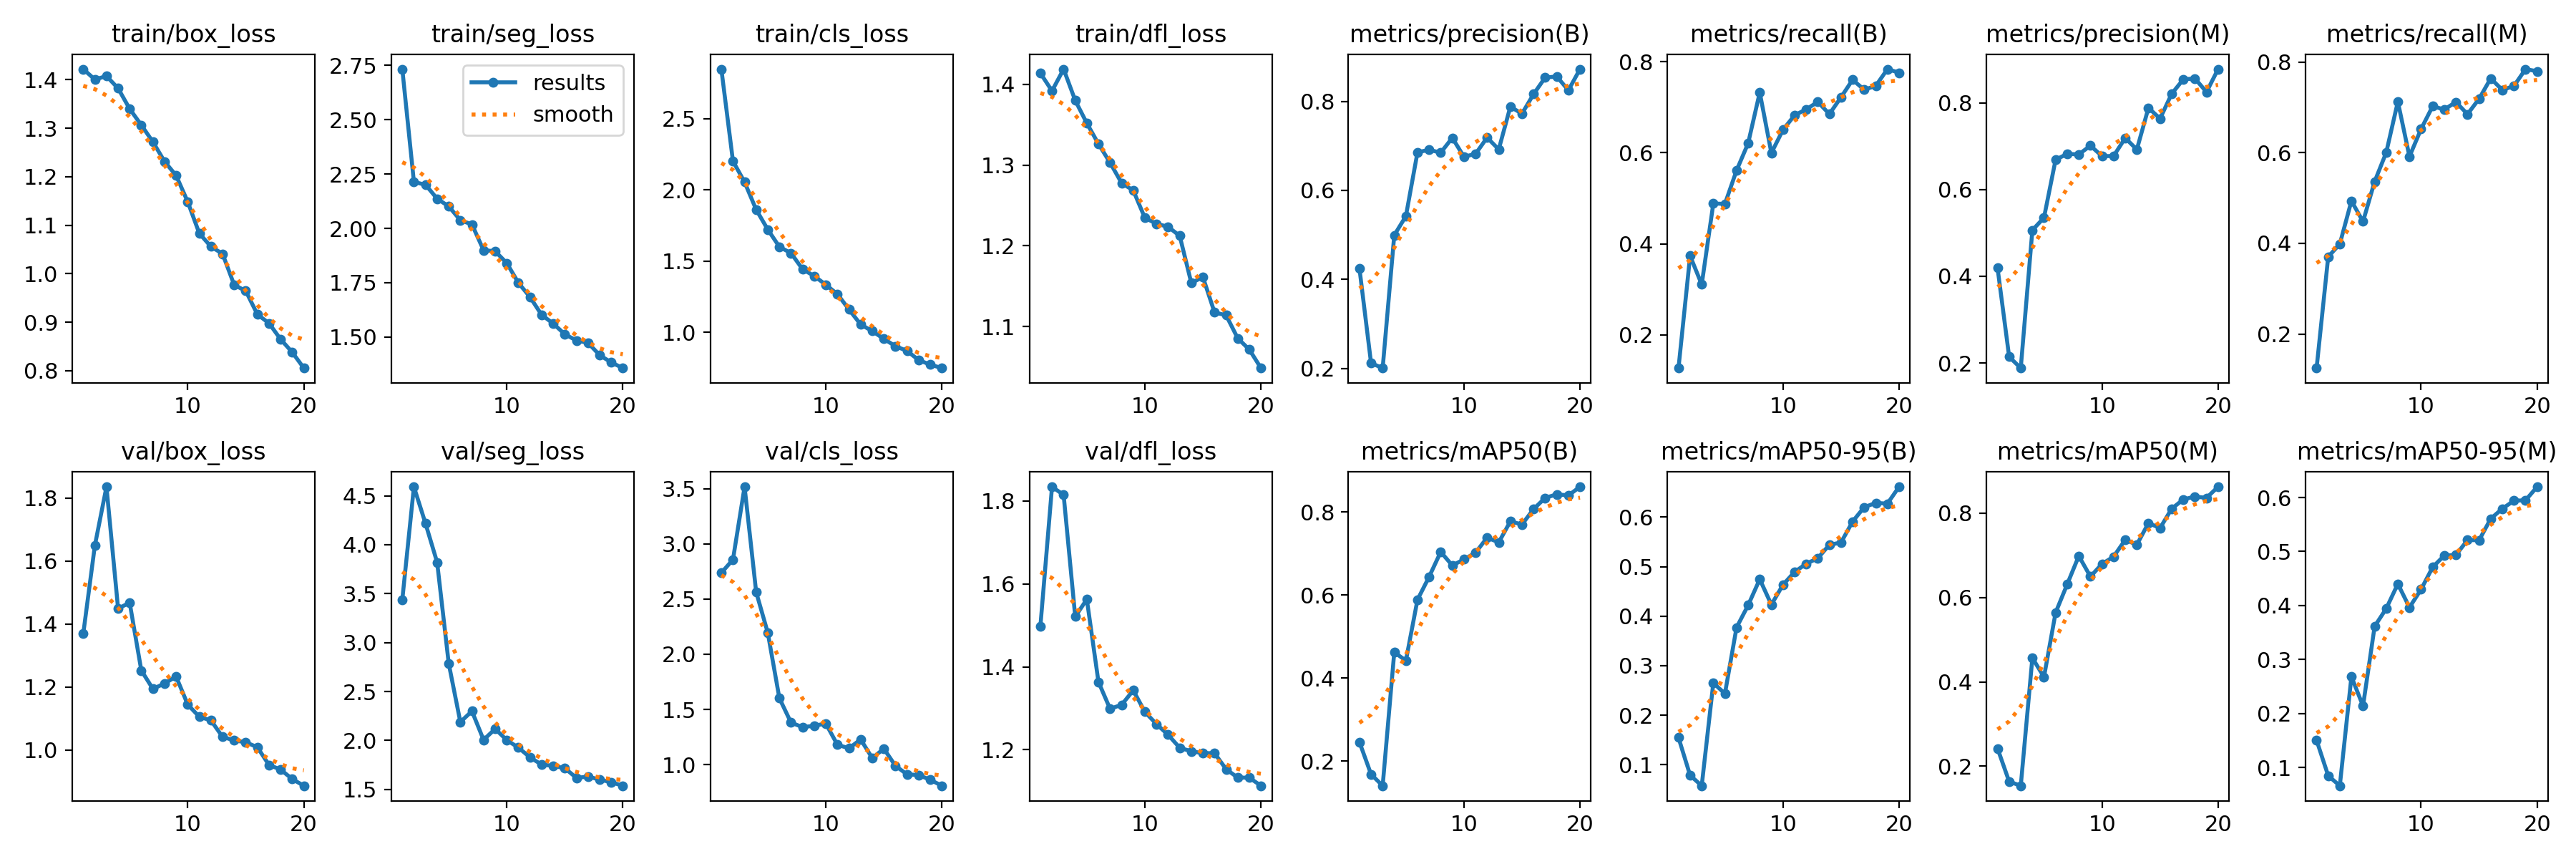

In [ ]:
import os
from IPython.display import Image, display

# Unzip runs.zip if /content/runs/ doesn't already exist
if not os.path.exists('/content/runs/segment/train'):
    !unzip /content/drive/MyDrive/BreastCancerProject/Datasets/runs.zip -d /content/

# Path to the results.png
results_path = '/content/runs/segment/train/results.png'

# Check if the results.png exists and display it
if os.path.exists(results_path):
    display(Image(filename=results_path))
else:
    print("❌ results.png not found at expected location:", results_path)


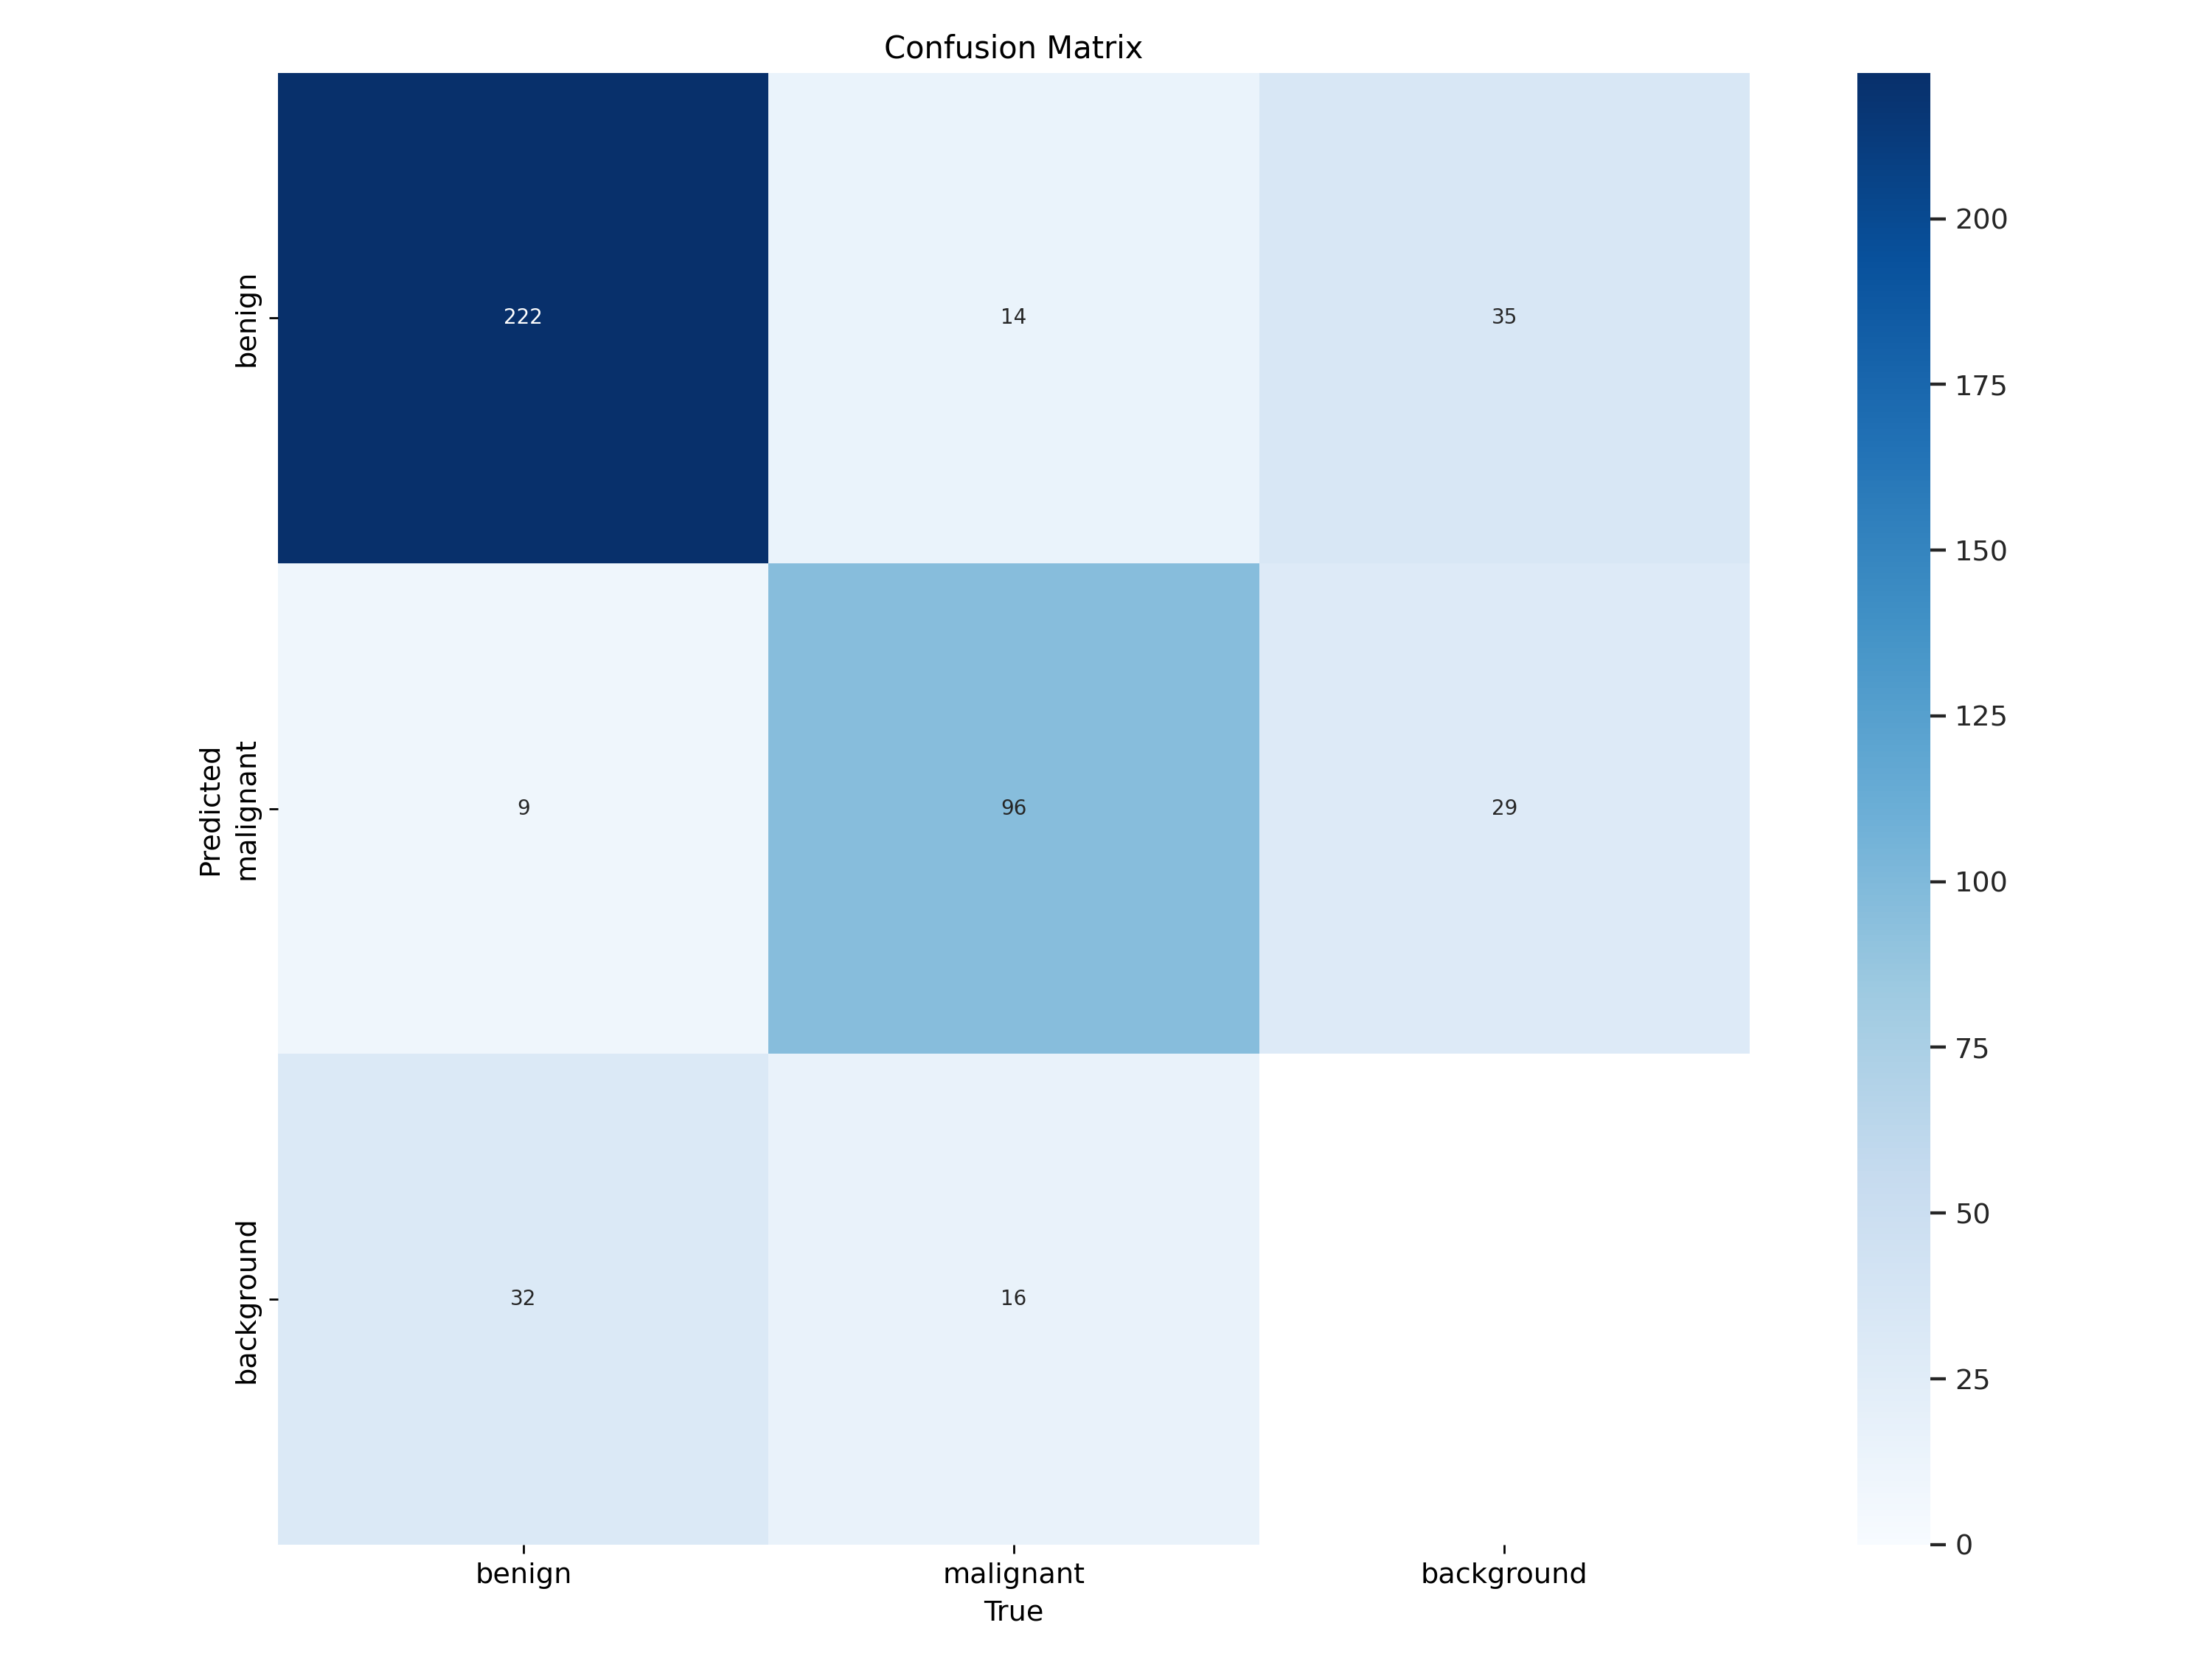

In [ ]:
import os
from IPython.display import Image, display

# Path to the confusion_matrix.png
conf_matrix_path = '/content/runs/segment/train/confusion_matrix.png'

# Check if the confusion_matrix.png exists and display it
if os.path.exists(conf_matrix_path):
    display(Image(filename=conf_matrix_path))
else:
    print("❌ confusion_matrix.png not found at expected location:", conf_matrix_path)


--- Segmentation Metrics (Pixel-wise) ---
Precision: 0.8727
Recall:    0.7758
F1 Score:  0.8214
IoU Score: 0.6969


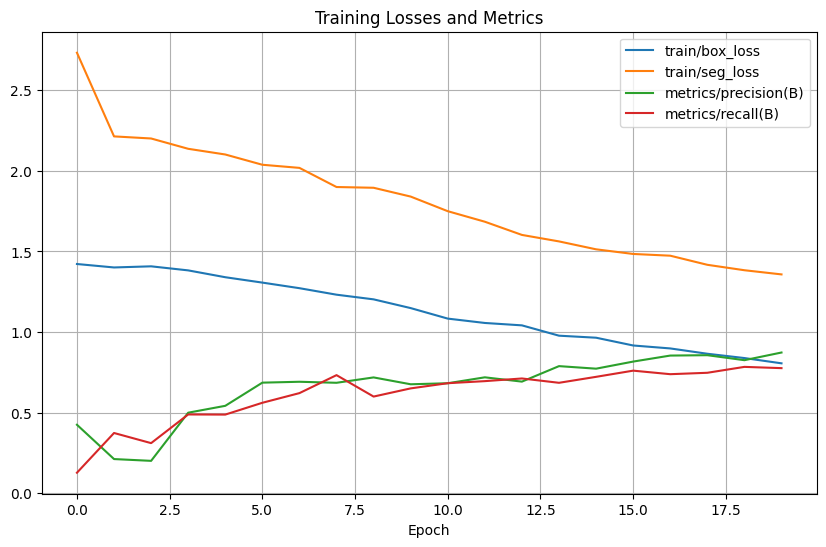

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your results CSV
results_path = '/content/runs/segment/train/results.csv'

# Load the results
results = pd.read_csv(results_path)

# --- Show final metrics ---
final_row = results.iloc[-1]
precision = final_row['metrics/precision(B)']
recall = final_row['metrics/recall(B)']

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate IoU Score
iou_score = (precision * recall) / (precision + recall - (precision * recall))

print('--- Segmentation Metrics (Pixel-wise) ---')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1_score:.4f}')
print(f'IoU Score: {iou_score:.4f}')

# --- Optional: plot curves ---
results[['train/box_loss', 'train/seg_loss', 'metrics/precision(B)', 'metrics/recall(B)']].plot(figsize=(10,6))
plt.title('Training Losses and Metrics')
plt.xlabel('Epoch')
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

--- Segmentation Metrics (Pixel-wise) ---
Precision: 0.6203
Recall:    0.6263
F1 Score:  0.6231
IoU Score: 0.5853

--- Class-wise Report ---
              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95       257
   Malignant       0.93      0.91      0.92       128
      Normal       0.00      0.00      0.00         8

    accuracy                           0.93       393
   macro avg       0.62      0.63      0.62       393
weighted avg       0.91      0.93      0.92       393

✅ Confusion matrix saved at: /content/final_confusion_matrix.png


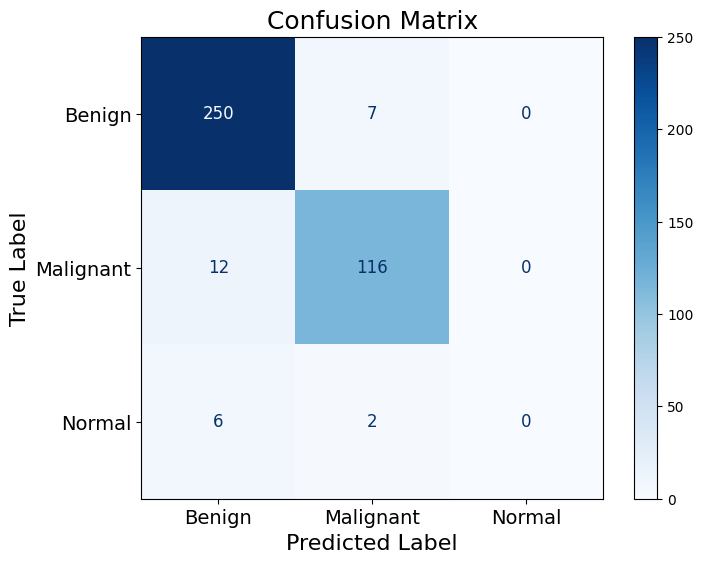

In [ ]:
from ultralytics import YOLO
import torch
import numpy as np
import glob
import os
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, jaccard_score

# 1. Load model
model = YOLO('/content/runs/segment/train/weights/best.pt')

# 2. Path to validation images
val_images_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/images'  # <-- adjust if needed
image_paths = glob.glob(os.path.join(val_images_dir, '*.png')) + glob.glob(os.path.join(val_images_dir, '*.jpg'))

# 3. Initialize lists
y_true = []
y_pred = []

# 4. Predict on each image
for img_path in image_paths:
    pred = model.predict(img_path, conf=0.25, iou=0.5, verbose=False)[0]

    if pred.masks is None:
        continue  # Skip if no masks predicted

    # Get predicted classes
    pred_classes = pred.boxes.cls.cpu().numpy()

    # Load true class manually from filename (assuming filenames contain class info, e.g., benign_123.png)
    filename = os.path.basename(img_path).lower()
    if 'benign' in filename:
        true_class = 0
    elif 'malignant' in filename:
        true_class = 1
    elif 'normal' in filename:
        true_class = 2
    else:
        continue  # skip if filename is weird

    # Match each predicted object to the true class
    for _ in range(len(pred_classes)):
        y_true.append(true_class)
        y_pred.append(int(pred_classes[0]))  # take first prediction (simplification)

# 5. Convert to numpy arrays
y_true = np.array(y_true).astype(int)
y_pred = np.array(y_pred).astype(int)

# 6. Class names
target_names = ['Benign', 'Malignant', 'Normal']

# 7. Print Overall Pixel-Wise Metrics
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
iou = jaccard_score(y_true, y_pred, average='macro')

print('--- Segmentation Metrics (Pixel-wise) ---')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')
print(f'IoU Score: {iou:.4f}')
print()

# 8. Print Class-wise Report
print('--- Class-wise Report ---')
print(classification_report(y_true, y_pred, target_names=target_names))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

fig, ax = plt.subplots(figsize=(8, 6))  # Bigger figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Make text larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for text in disp.text_.ravel():
    text.set_fontsize(12)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

# Save confusion matrix
output_path = '/content/final_confusion_matrix.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"✅ Confusion matrix saved at: {output_path}")

plt.show()



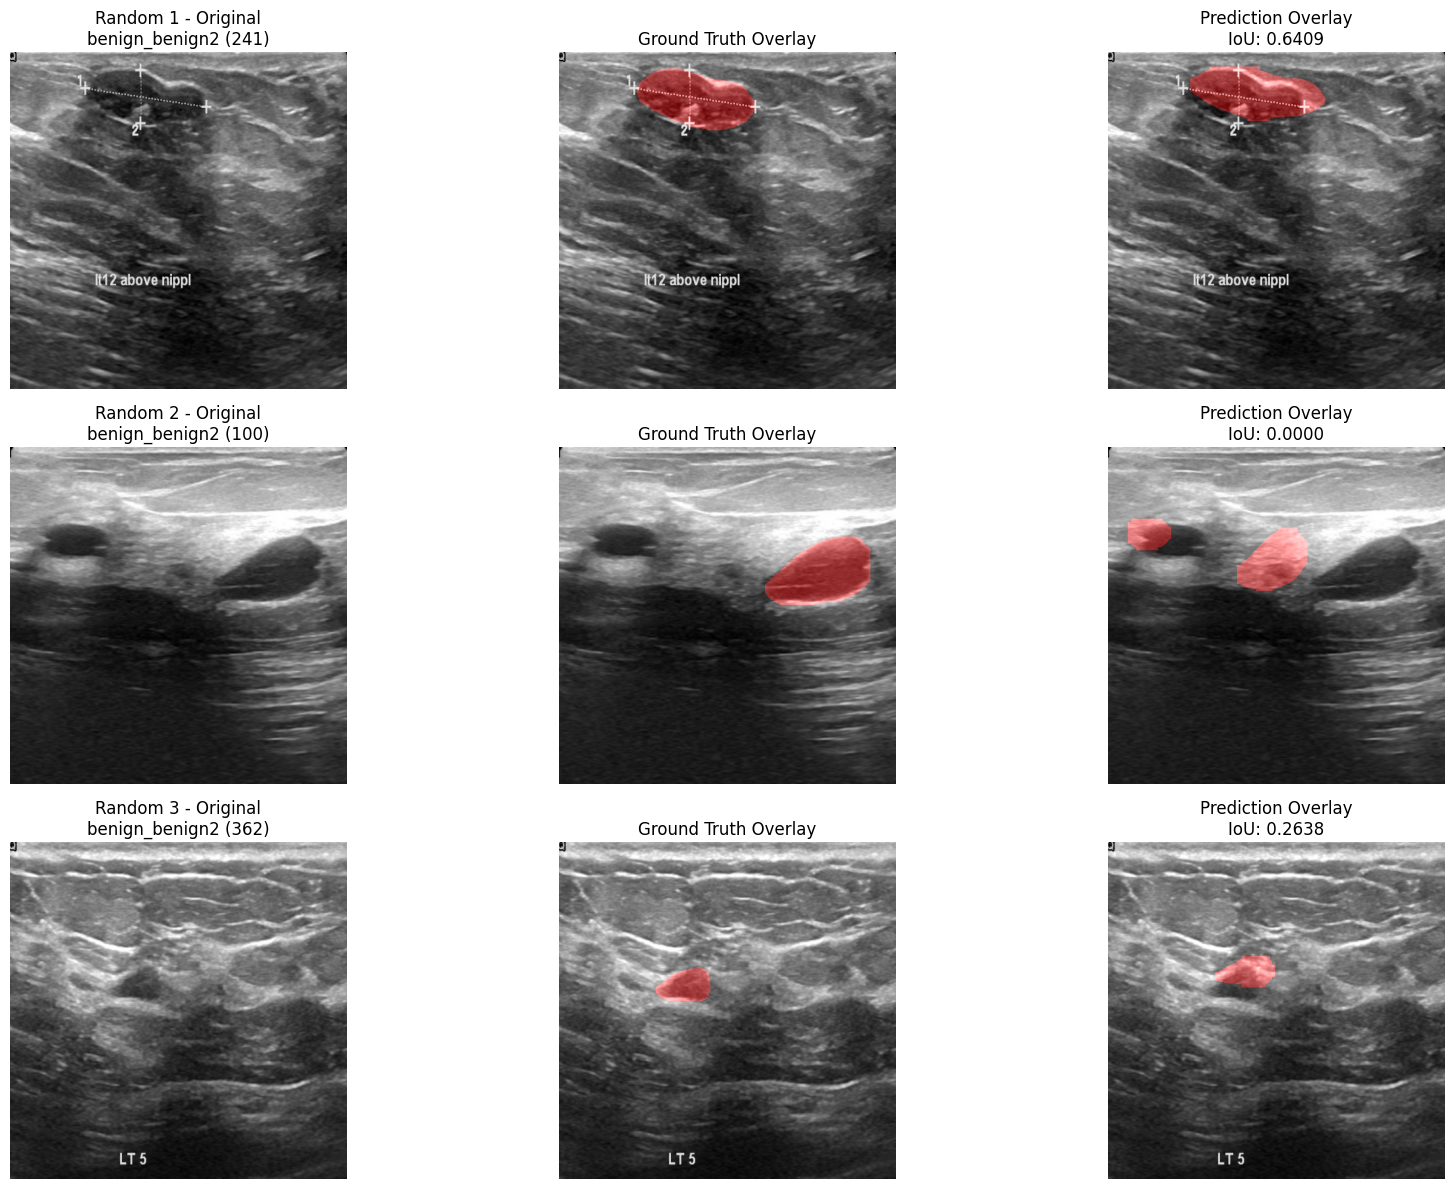

In [23]:
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import jaccard_score

# --- Load model ---
model = YOLO('/content/runs/segment/train/weights/best.pt')

# --- Helper Functions ---

def load_mask_from_label(label_path):
    """Create binary mask from YOLO label file."""
    mask = np.zeros((512, 512), dtype=np.uint8)
    if not os.path.exists(label_path):
        return mask
    with open(label_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 7:
            points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
            points[:, 0] *= 512
            points[:, 1] *= 512
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 255)
    return mask

def predict_mask(image_path):
    """Predict mask from image using YOLOv8."""
    pred = model.predict(image_path, conf=0.25, iou=0.5, verbose=False)[0]
    mask = np.zeros((512, 512), dtype=np.uint8)
    if pred.masks is not None:
        for seg in pred.masks.xy:
            seg = np.array(seg, dtype=np.int32)
            cv2.fillPoly(mask, [seg], 255)
    return mask

def calculate_iou(gt_mask, pred_mask):
    """Calculate IoU score."""
    gt_flat = gt_mask.flatten() > 0
    pred_flat = pred_mask.flatten() > 0
    if np.sum(gt_flat) == 0 and np.sum(pred_flat) == 0:
        return 1.0
    if np.sum(gt_flat) == 0 or np.sum(pred_flat) == 0:
        return 0.0
    return jaccard_score(gt_flat, pred_flat)

def overlay_mask(image, mask, color=(0, 255, 0), alpha=0.4):
    """Overlay mask on image."""
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    colored_mask = np.zeros_like(overlay)
    colored_mask[:, :, 0] = mask  # Blue channel
    overlay = cv2.addWeighted(overlay, 1.0, colored_mask, alpha, 0)
    return overlay

# --- Load validation images ---
val_images_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/images'
val_labels_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/labels'

image_paths = [os.path.join(val_images_dir, f) for f in os.listdir(val_images_dir) if f.endswith(('.png', '.jpg'))]

# --- Gather all results ---
results = []

for img_path in image_paths:
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(val_labels_dir, base_name + '.txt')

    gt_mask = load_mask_from_label(label_path)
    pred_mask = predict_mask(img_path)

    iou = calculate_iou(gt_mask, pred_mask)

    # Load original image
    original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))

    results.append({
        'image_path': img_path,
        'original_img': original_img,
        'gt_mask': gt_mask,
        'pred_mask': pred_mask,
        'iou': iou,
        'base_name': base_name
    })

# --- Filter ONLY benign and malignant samples ---
benign_malignant_samples = [r for r in results if 'benign' in r['base_name'].lower() or 'malignant' in r['base_name'].lower()]

# --- Pick 3 random benign/malignant samples ---
random_samples = random.sample(benign_malignant_samples, 3)

# --- Plot ---
plt.figure(figsize=(18, 12))

for idx, sample in enumerate(random_samples):
    # Original Image
    plt.subplot(3, 3, idx*3 + 1)
    plt.imshow(sample['original_img'], cmap='gray')
    plt.title(f"Random {idx+1} - Original\n{sample['base_name']}")
    plt.axis('off')

    # Ground Truth Overlay
    plt.subplot(3, 3, idx*3 + 2)
    gt_overlay = overlay_mask(sample['original_img'], sample['gt_mask'])
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Overlay")
    plt.axis('off')

    # Prediction Overlay
    plt.subplot(3, 3, idx*3 + 3)
    pred_overlay = overlay_mask(sample['original_img'], sample['pred_mask'])
    plt.imshow(pred_overlay)
    plt.title(f"Prediction Overlay\nIoU: {sample['iou']:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


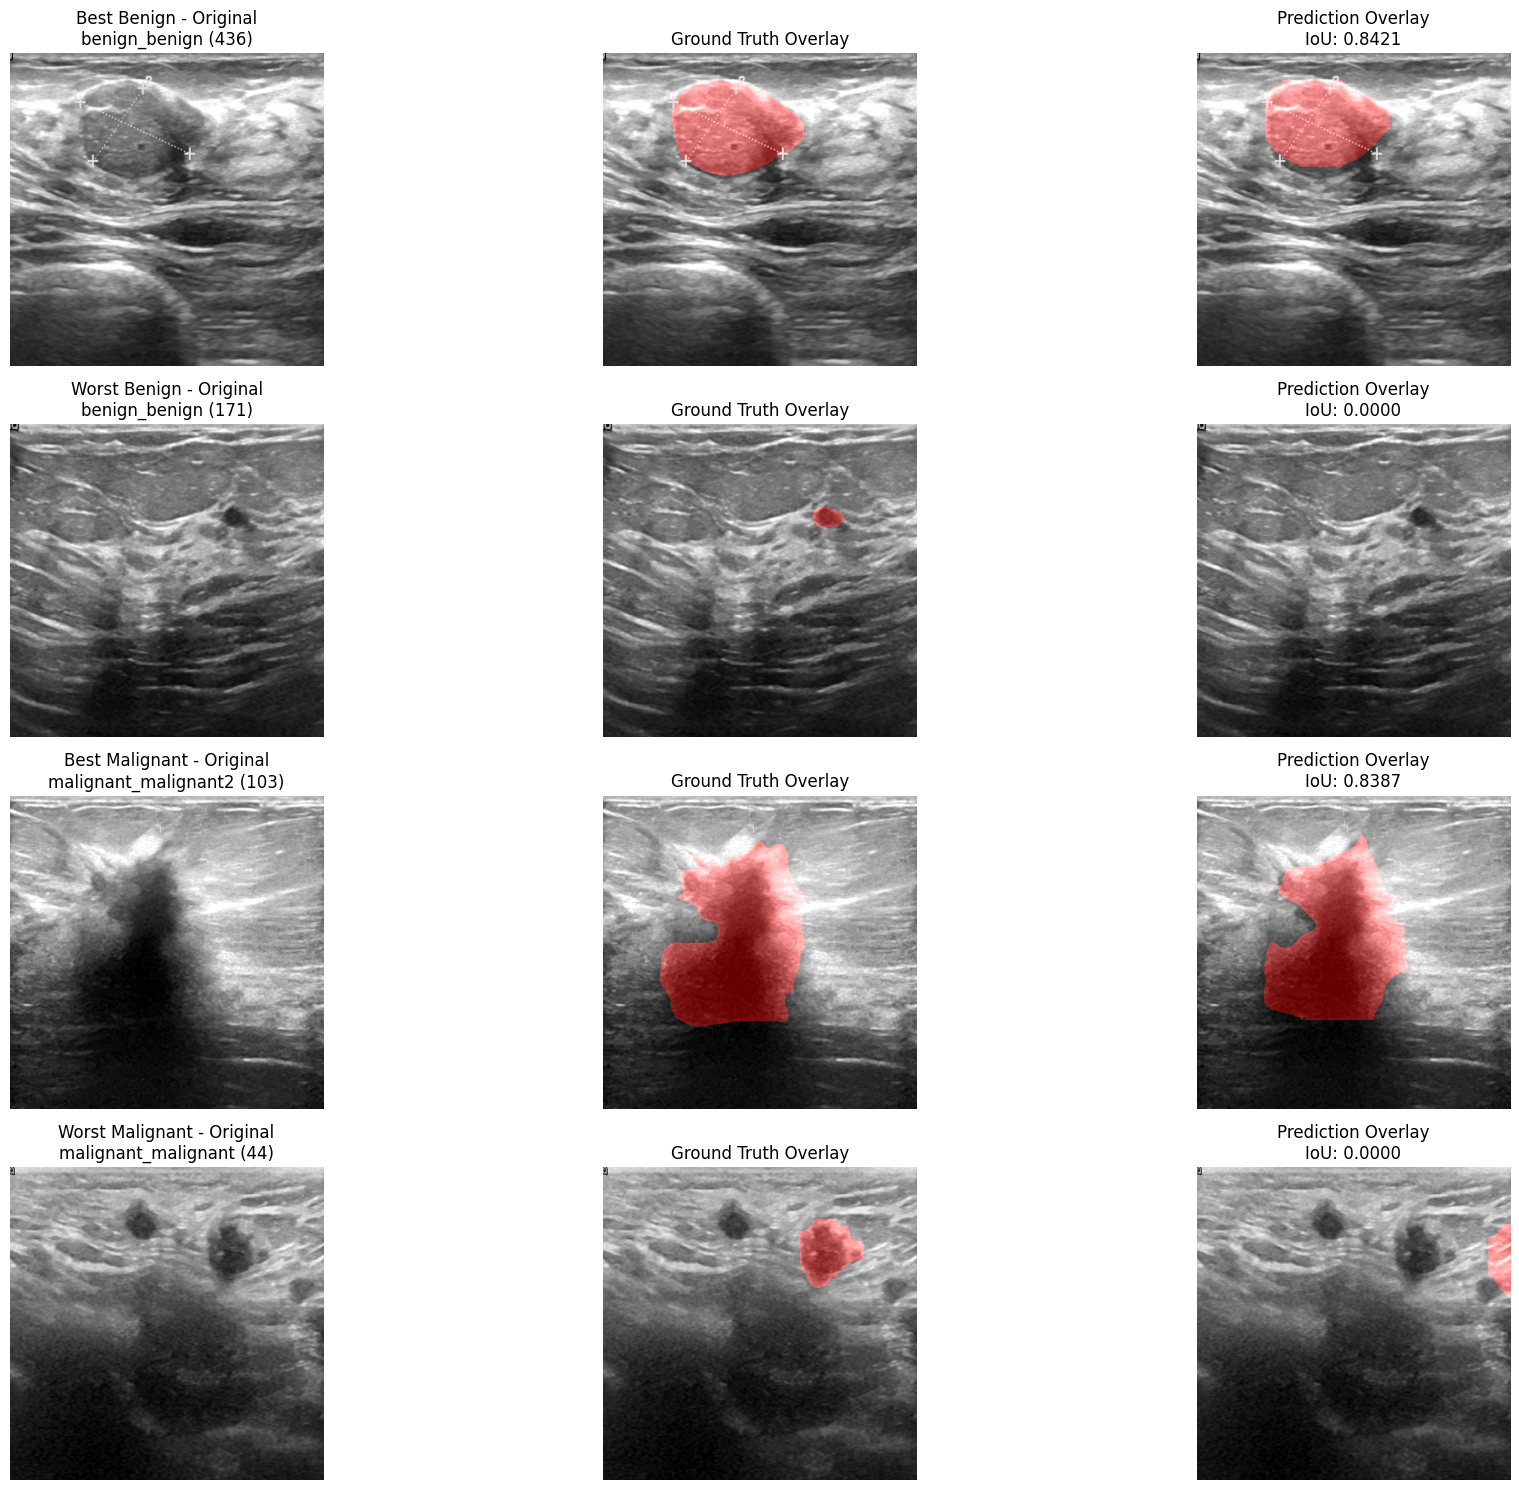

In [24]:
# --- Filter by class ---
benign_samples = [r for r in results if 'benign' in r['base_name'].lower()]
malignant_samples = [r for r in results if 'malignant' in r['base_name'].lower()]

# --- Pick best and worst from each ---
best_benign = max(benign_samples, key=lambda x: x['iou'])
worst_benign = min(benign_samples, key=lambda x: x['iou'])
best_malignant = max(malignant_samples, key=lambda x: x['iou'])
worst_malignant = min(malignant_samples, key=lambda x: x['iou'])

special_samples = [
    (best_benign, 'Best Benign'),
    (worst_benign, 'Worst Benign'),
    (best_malignant, 'Best Malignant'),
    (worst_malignant, 'Worst Malignant')
]

# --- Plot ---
plt.figure(figsize=(20, 15))

for idx, (sample, title_text) in enumerate(special_samples):
    # Original Image
    plt.subplot(4, 3, idx*3 + 1)
    plt.imshow(sample['original_img'], cmap='gray')
    plt.title(f"{title_text} - Original\n{sample['base_name']}")
    plt.axis('off')

    # Ground Truth Overlay
    plt.subplot(4, 3, idx*3 + 2)
    gt_overlay = overlay_mask(sample['original_img'], sample['gt_mask'])
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Overlay")
    plt.axis('off')

    # Prediction Overlay
    plt.subplot(4, 3, idx*3 + 3)
    pred_overlay = overlay_mask(sample['original_img'], sample['pred_mask'])
    plt.imshow(pred_overlay)
    plt.title(f"Prediction Overlay\nIoU: {sample['iou']:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


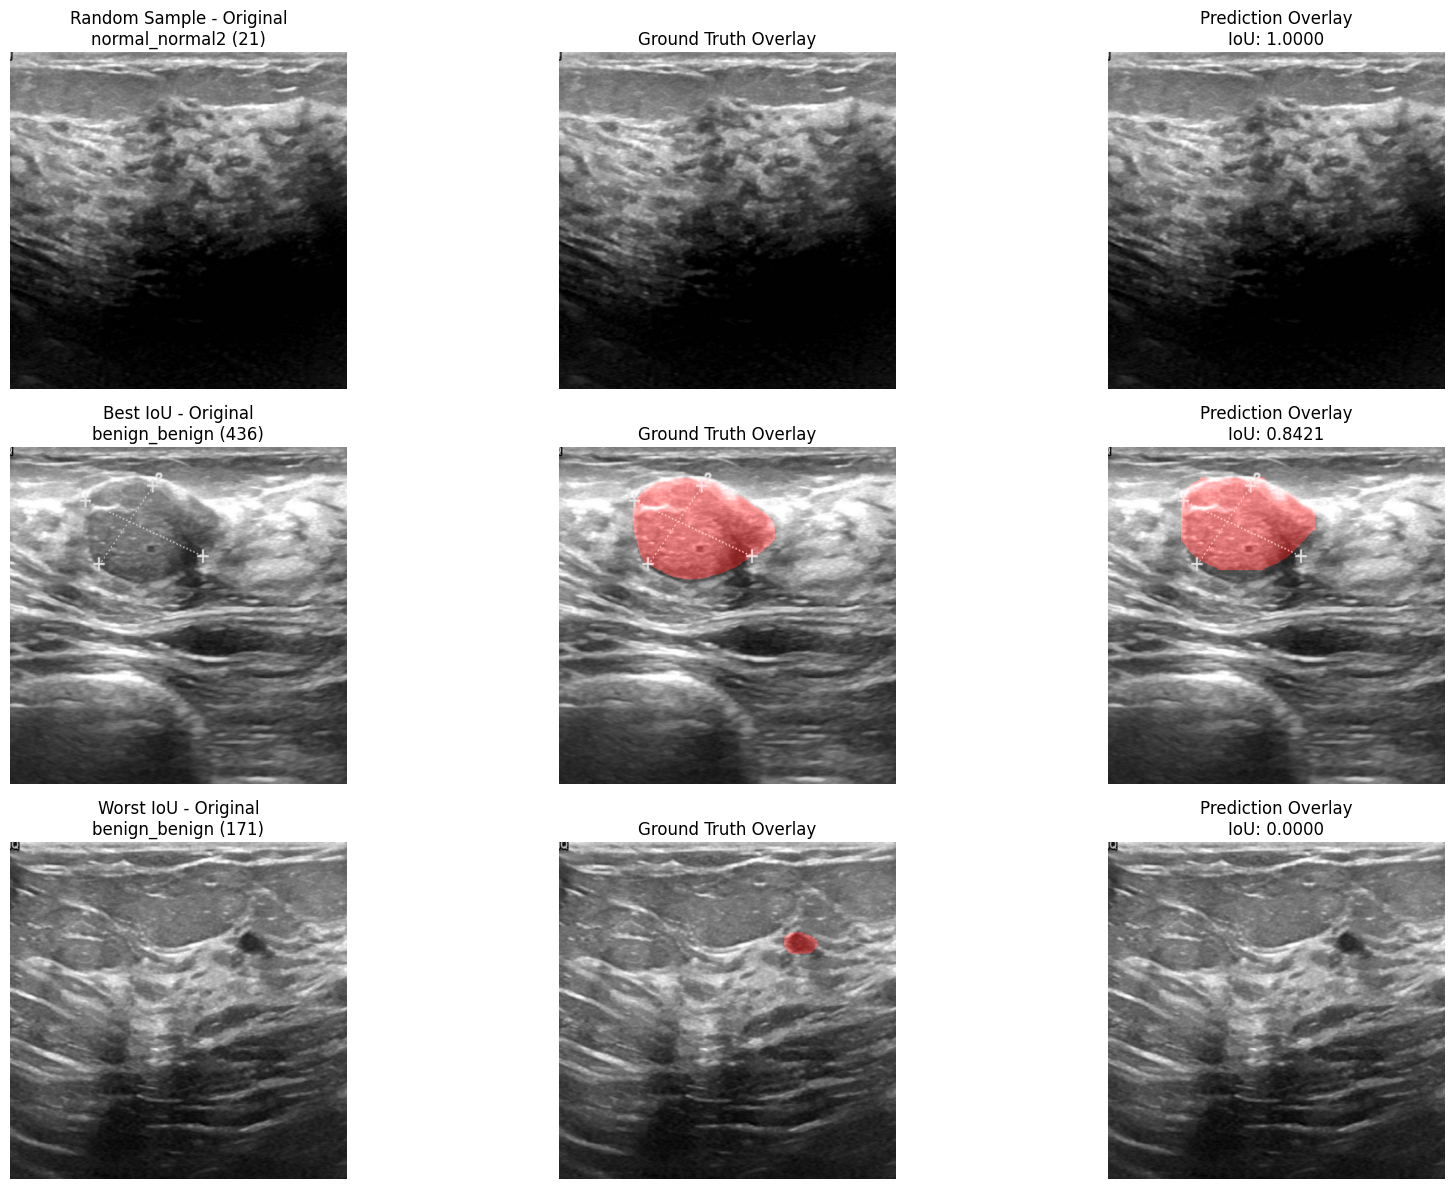

In [22]:
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import jaccard_score

# --- Paths ---
val_images_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/images'
val_labels_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/labels'

# --- Load Model ---
model = YOLO('/content/runs/segment/train/weights/best.pt')

# --- Helper Functions ---

def load_mask_from_label(label_path):
    """Create binary mask from YOLO label file."""
    mask = np.zeros((512, 512), dtype=np.uint8)
    if not os.path.exists(label_path):
        return mask
    with open(label_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 7:
            points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
            points[:, 0] *= 512
            points[:, 1] *= 512
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 255)
    return mask

def predict_mask(image_path):
    """Predict mask from image using YOLOv8."""
    pred = model.predict(image_path, conf=0.25, iou=0.5, verbose=False)[0]
    mask = np.zeros((512, 512), dtype=np.uint8)
    if pred.masks is not None:
        for seg in pred.masks.xy:
            seg = np.array(seg, dtype=np.int32)
            cv2.fillPoly(mask, [seg], 255)
    return mask

def calculate_iou(gt_mask, pred_mask):
    """Calculate IoU score."""
    gt_flat = gt_mask.flatten() > 0
    pred_flat = pred_mask.flatten() > 0
    if np.sum(gt_flat) == 0 and np.sum(pred_flat) == 0:
        return 1.0
    if np.sum(gt_flat) == 0 or np.sum(pred_flat) == 0:
        return 0.0
    return jaccard_score(gt_flat, pred_flat)

def overlay_mask(image, mask, color=(0, 255, 0), alpha=0.4):
    """Overlay mask on image."""
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    colored_mask = np.zeros_like(overlay)
    colored_mask[:, :, 0] = mask  # Blue channel
    overlay = cv2.addWeighted(overlay, 1.0, colored_mask, alpha, 0)
    return overlay

# --- Evaluate all validation images ---
image_paths = [os.path.join(val_images_dir, f) for f in os.listdir(val_images_dir) if f.endswith(('.png', '.jpg'))]

results = []

for img_path in image_paths:
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(val_labels_dir, base_name + '.txt')

    gt_mask = load_mask_from_label(label_path)
    pred_mask = predict_mask(img_path)

    iou = calculate_iou(gt_mask, pred_mask)

    # Load original image
    original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))  # Make sure size matches

    results.append({
        'image_path': img_path,
        'original_img': original_img,
        'gt_mask': gt_mask,
        'pred_mask': pred_mask,
        'iou': iou,
        'base_name': base_name
    })

# --- Pick samples ---
random_sample = random.choice(results)

# Only benign/malignant for best sample
benign_malignant_samples = [r for r in results if 'benign' in r['base_name'].lower() or 'malignant' in r['base_name'].lower()]
best_sample = max(benign_malignant_samples, key=lambda x: x['iou'])

worst_sample = min(results, key=lambda x: x['iou'])  # all types for worst


samples = [random_sample, best_sample, worst_sample]
titles = ['Random Sample', 'Best IoU', 'Worst IoU']

# --- Plot ---
plt.figure(figsize=(18, 12))

for idx, sample in enumerate(samples):
    # Original Image
    plt.subplot(3, 3, idx*3 + 1)
    plt.imshow(sample['original_img'], cmap='gray')
    plt.title(f"{titles[idx]} - Original\n{sample['base_name']}")
    plt.axis('off')

    # Overlay Ground Truth Mask
    plt.subplot(3, 3, idx*3 + 2)
    gt_overlay = overlay_mask(sample['original_img'], sample['gt_mask'])
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Overlay")
    plt.axis('off')

    # Overlay Predicted Mask
    plt.subplot(3, 3, idx*3 + 3)
    pred_overlay = overlay_mask(sample['original_img'], sample['pred_mask'])
    plt.imshow(pred_overlay)
    plt.title(f"Prediction Overlay\nIoU: {sample['iou']:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()
